<a href="https://colab.research.google.com/github/thruuuuuu/telco_churn_predict_model/blob/main/notebooks/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install imbalanced-learn shap


# Setup

In [23]:
import pandas as pd

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display first few rows
data = pd.DataFrame(df)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Quick Exploration

In [2]:
df.head()
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


# Indexing

In [6]:
df.iloc[:, 3]

,Partner
0,Yes
1,No
2,No
3,No
4,No
...,...
7038,Yes
7039,Yes
7040,Yes
7041,Yes


Check for Missing Values

In [22]:

# The 'TotalCharges' column is of object (string) type due to empty strings ('') for new customers.
print(f"Initial data type of TotalCharges: {df['TotalCharges'].dtype}")

# Convert to numeric, coercing the non-numeric values (empty strings) to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

nan_count = df['TotalCharges'].isnull().sum()
print(f"\nNumber of NaN values found in TotalCharges: {nan_count}\n")

# Check the rows where TotalCharges is NaN (confirms tenure is 0)
if nan_count > 0:
    print("Rows with missing TotalCharges (tenure is typically 0):")
    print(df[df['TotalCharges'].isnull()][['tenure', 'MonthlyCharges', 'TotalCharges']].to_markdown(index=False))



Initial data type of TotalCharges: float64

Number of NaN values found in TotalCharges: 11

Rows with missing TotalCharges (tenure is typically 0):
|   tenure |   MonthlyCharges |   TotalCharges |
|---------:|-----------------:|---------------:|
|        0 |            52.55 |            nan |
|        0 |            20.25 |            nan |
|        0 |            80.85 |            nan |
|        0 |            25.75 |            nan |
|        0 |            56.05 |            nan |
|        0 |            19.85 |            nan |
|        0 |            25.35 |            nan |
|        0 |            20    |            nan |
|        0 |            19.7  |            nan |
|        0 |            73.35 |            nan |
|        0 |            61.9  |            nan |


Check for duplicate rows

In [6]:
duplicate_customer_ids = df['customerID'].duplicated().sum()
duplicate_customer_ids

np.int64(0)

Target Variable Distribution

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

churn_counts = df['Churn'].value_counts()
churn_percent = df['Churn'].value_counts(normalize=True) * 100

churn_counts
churn_percent

# EDA Distributions Visualization

Churn Statistics Visualization (Bar Chart, Pie Chart)

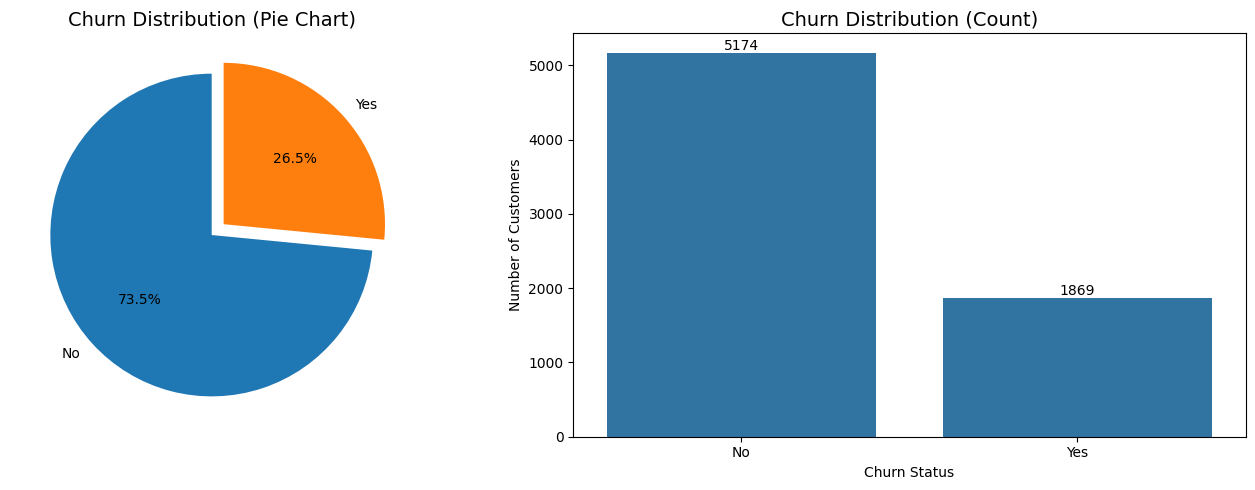

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

#Pie chart
axes[0].pie(
    churn_counts,
    labels=churn_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    explode=(0, 0.1)
)
axes[0].set_title('Churn Distribution (Pie Chart)', fontsize=14)

# Bar chart
sns.countplot(data=df, x='Churn', ax=axes[1])
axes[1].set_title('Churn Distribution (Count)', fontsize=14)
axes[1].set_xlabel('Churn Status')
axes[1].set_ylabel('Number of Customers')

# labels on bars
for container in axes[1].containers:
    axes[1].bar_label(container)

plt.tight_layout()
plt.show()


Visualize correlation (for numerical columns)

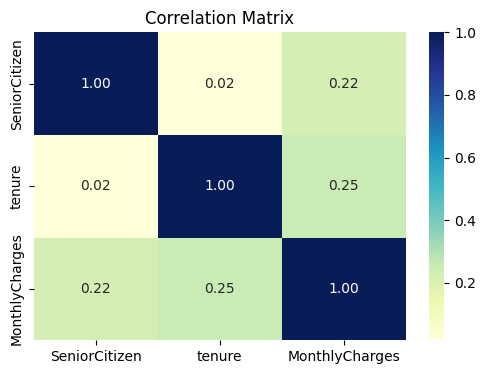

In [30]:
numerical_data = data.select_dtypes(include=['number'])

# Calculate correlation
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title("Correlation Matrix")
plt.show()

Histogram for Numerical Features

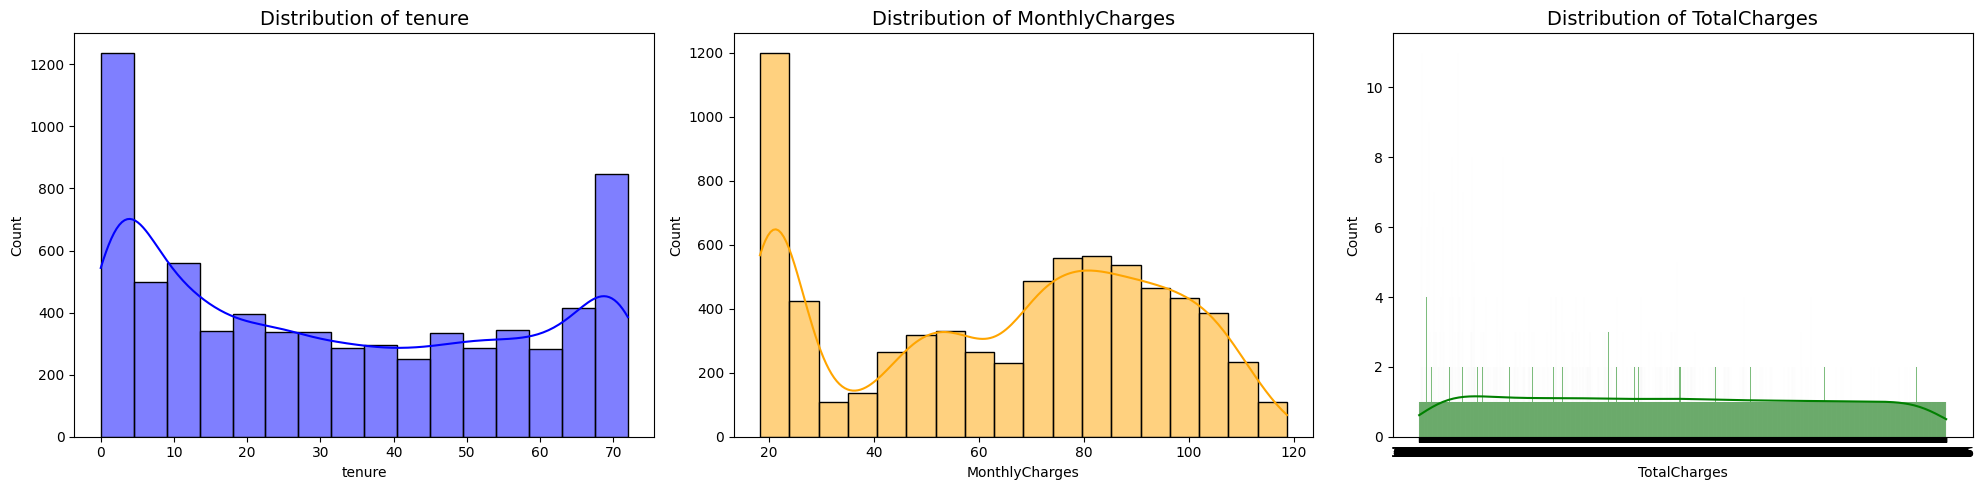

In [28]:

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Subplots for 3 features
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
colors = ['blue', 'orange', 'green']  # One color per feature

# Loop through numerical features
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color=colors[i])
    axes[i].set_title(f"Distribution of {col}", fontsize=14)

plt.tight_layout()
plt.show()


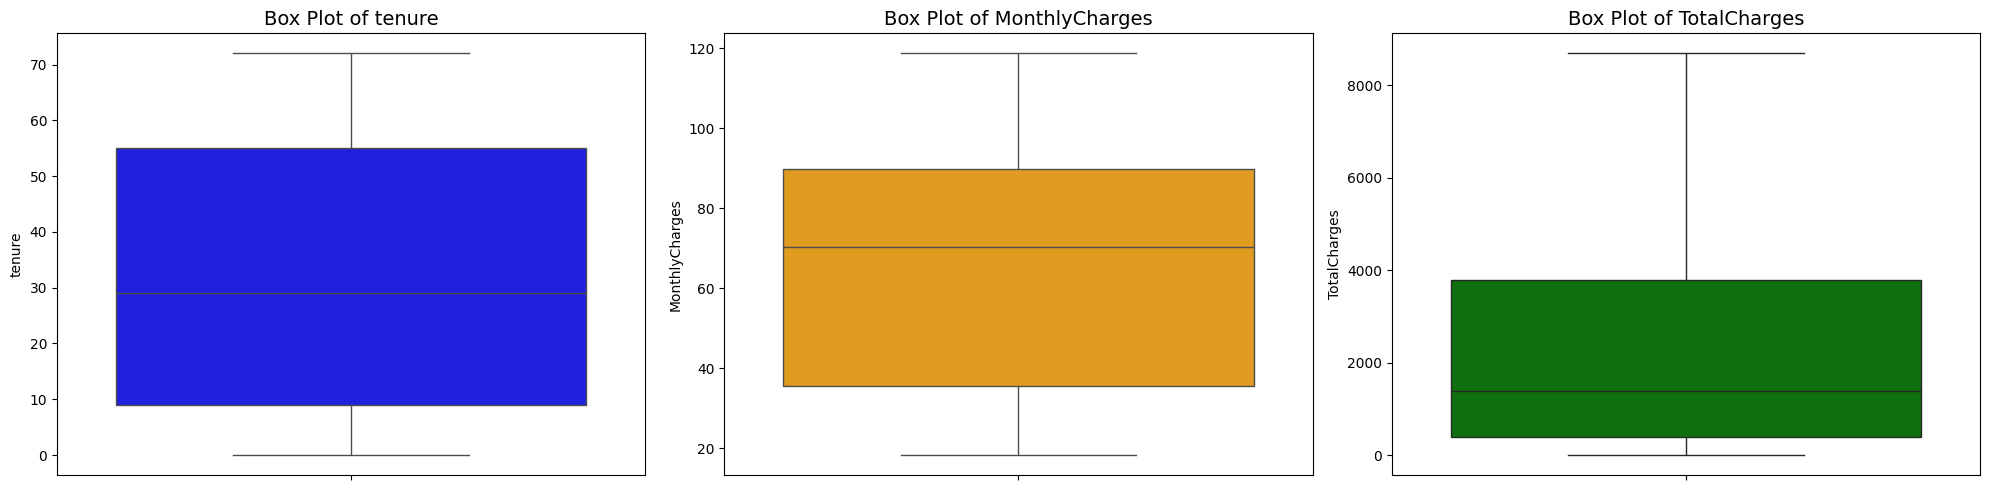

In [33]:

import math

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Subplots for 3 features
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
colors = ['blue', 'orange', 'green']  # One color per feature

# Loop through numerical features
for i, col in enumerate(numerical_cols):
    sns.boxplot(data=numerical_data, y=col, ax=axes[i], color=colors[i % len(colors)])
    axes[i].set_title(f"Box Plot of {col}", fontsize=14)

plt.tight_layout()
plt.show()
